<a href="https://colab.research.google.com/github/Jayrok0/Ovechkin-Projection1/blob/main/Projection%20for%20Ovechkin%20breaking%20career%20goal%20record.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the following notebook, I manually collected goal amounts for Ovechkin to create a baseline to simulate the remaining games in the schedule to predict when Ovechkin would pass Wayne Gretsky's all time career goals record (894). At the time of creating this projection, there were 32 games until I projected Ovechkin passing the record, only modifying to account for post injury performance with a slightly increased weighting (5:4) for data from after his lower leg injury on 11/18/2024, to account for both post injury performance, but also making the weighting only minimal as Ovechkin is a veteran player and has considerably more experience with injuries, as well as a more diminished reliance on his athleticism at the ripe age of 39. The libraries used to simulate and derive a most likely time of passing the career high mark (per our simulation, this would most likely occur on April 6th 2025 against the Islanders. To perform these simulations, I simply used pandas to store our data, numpy to simulate the remaining games and Ovechkins goal rate, and matplotlib.pyplot to visualize our outcomes. In doing so, I was accurately able to predict when Ovechkin would pass the record, being on April 6th, 2025.

In essence, the code takes historical and recent performance data, incorporates a weighting for post-injury performance, simulates the remaining games 1000 times, and provides statistical projections and visualizations on when Ovechkin was most likely to break the record.


Ovechkin's Record Chase Analysis
Current Goals: 874
Goals Needed: 21

Scoring Rates:
Home: 0.48 goals per game
Away: 0.67 goals per game

Progress:
Current Game Number: 1,417
Predicted Record-Breaking Game: 1449 (4-6-25 against Islanders)
Games Until Record: 32

Probability of Breaking Record This Season: 52.9%


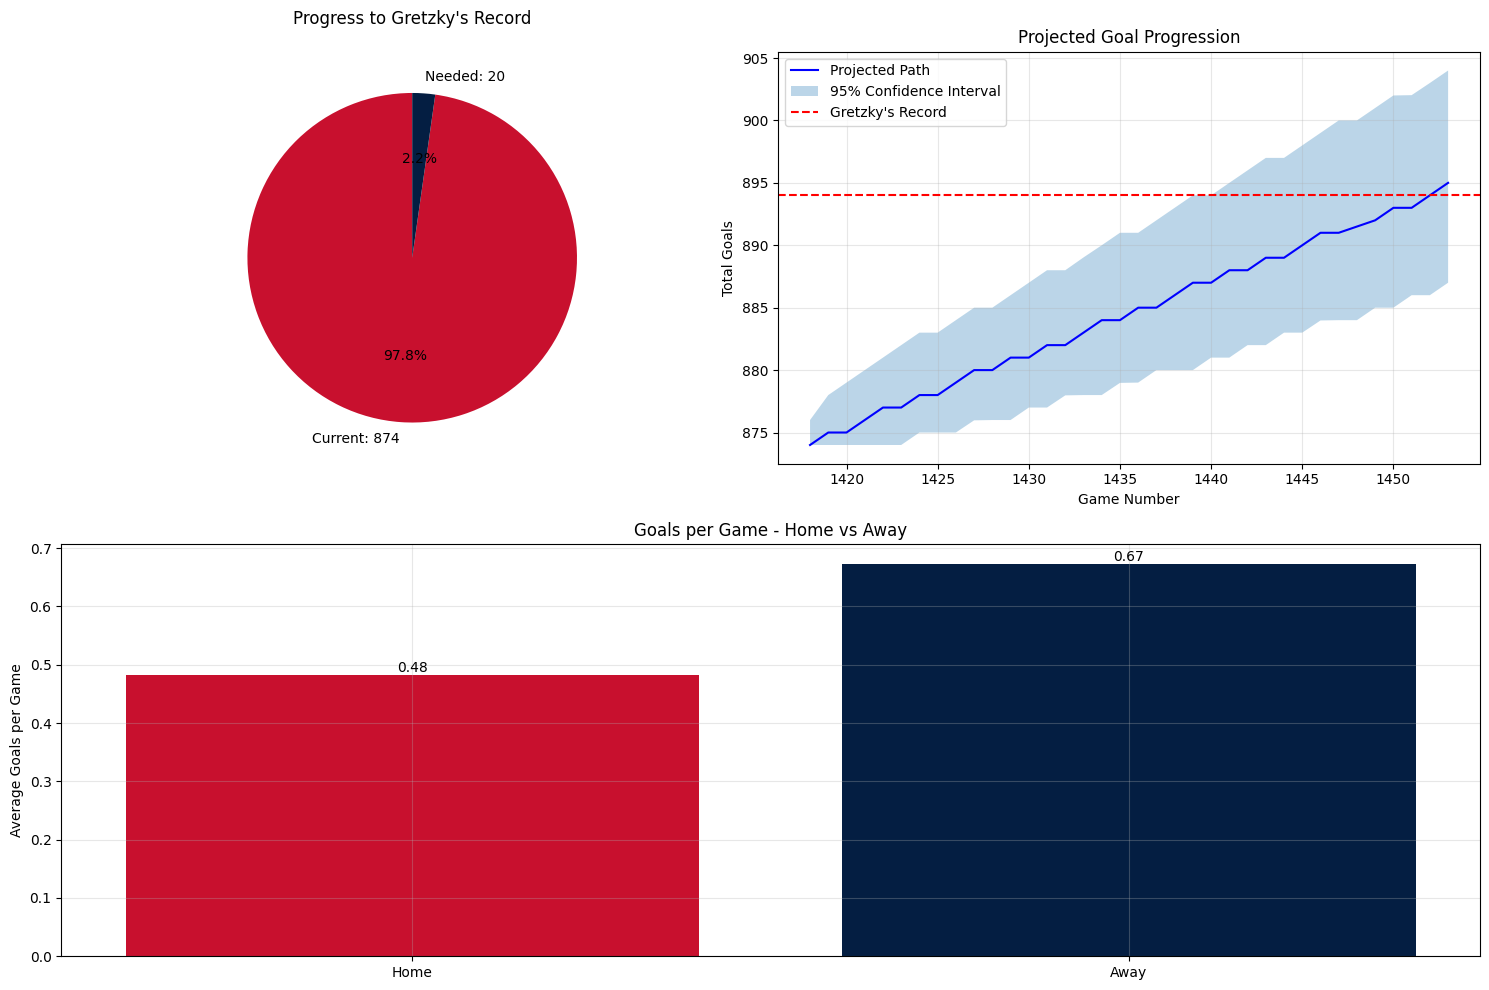

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_ovechkin_record_chase(current_goals=874, current_games=1417):
    """
    Comprehensive analysis of Ovechkin's progress towards the goal record with post-injury performance weighting
    """
    # Historical data with home/away splits, corrected for 2024-25 season
    seasons_data = {
        '2018-19': {'games_home': 41, 'goals_home': 29, 'games_away': 40, 'goals_away': 22},
        '2019-20': {'games_home': 34, 'goals_home': 27, 'games_away': 34, 'goals_away': 21},
        '2020-21': {'games_home': 23, 'goals_home': 14, 'games_away': 22, 'goals_away': 10},
        '2021-22': {'games_home': 39, 'goals_home': 28, 'games_away': 38, 'goals_away': 22},
        '2022-23': {'games_home': 37, 'goals_home': 24, 'games_away': 36, 'goals_away': 18},
        '2023-24': {'games_home': 41, 'goals_home': 22, 'games_away': 38, 'goals_away': 9},
        '2024-25': {'games_home': 15, 'goals_home': 8, 'games_away': 13, 'goals_away': 13}  # Before injury adjustment
    }

    # Adjust for post-injury performance
    post_injury = {
        'games_home': 6,
        'goals_home': 2,
        'games_away': 5,
        'goals_away': 4
    }

    # Remove post-injury stats from 2024-25 season
    seasons_data['2024-25']['games_home'] -= post_injury['games_home']
    seasons_data['2024-25']['goals_home'] -= post_injury['goals_home']
    seasons_data['2024-25']['games_away'] -= post_injury['games_away']
    seasons_data['2024-25']['goals_away'] -= post_injury['goals_away']

    # Calculate pre-injury rates
    total_home_games = sum(season['games_home'] for season in seasons_data.values())
    total_home_goals = sum(season['goals_home'] for season in seasons_data.values())
    total_away_games = sum(season['games_away'] for season in seasons_data.values())
    total_away_goals = sum(season['goals_away'] for season in seasons_data.values())

    pre_injury_home_rate = total_home_goals / total_home_games if total_home_games > 0 else 0
    pre_injury_away_rate = total_away_goals / total_away_games if total_away_games > 0 else 0

    # Weighted rates for post-injury performance
    weight = 5/4  # 5:4 weighting
    weighted_home_rate = (pre_injury_home_rate + weight * (post_injury['goals_home'] / post_injury['games_home'])) / (1 + weight)
    weighted_away_rate = (pre_injury_away_rate + weight * (post_injury['goals_away'] / post_injury['games_away'])) / (1 + weight)

    # Remaining schedule simulation
    remaining_games = 82 - (seasons_data['2024-25']['games_home'] + seasons_data['2024-25']['games_away'] +
                            post_injury['games_home'] + post_injury['games_away'])

    # Create balanced remaining schedule
    remaining_home = 17
    remaining_away = 19

    schedule_list = []
    game_number = current_games + 1

    # Alternate home and away games
    for _ in range(max(remaining_home, remaining_away)):
        if remaining_home > 0:
            schedule_list.append({'game_number': game_number, 'location': 'home'})
            game_number += 1
            remaining_home -= 1
        if remaining_away > 0:
            schedule_list.append({'game_number': game_number, 'location': 'away'})
            game_number += 1
            remaining_away -= 1

    remaining_schedule = pd.DataFrame(schedule_list)

    # Simulate remaining games using weighted rates
    np.random.seed(42)  # For reproducibility
    simulations = 1000
    simulation_data = []

    for sim in range(simulations):
        goals = current_goals
        for _, game in remaining_schedule.iterrows():
            rate = weighted_home_rate if game['location'] == 'home' else weighted_away_rate
            scored = np.random.poisson(rate)
            goals += scored
            simulation_data.append({
                'game_number': game['game_number'],
                'goals': goals,
                'simulation': sim
            })

    simulation_df = pd.DataFrame(simulation_data)

    # Create visualizations
    fig = plt.figure(figsize=(15, 10))

    # 1. Progress to Record Visualization
    ax1 = plt.subplot(221)
    progress_percentage = (current_goals / 894) * 100
    remaining_percentage = 100 - progress_percentage

    colors = ['#C8102E', '#041E42']  # Capitals colors
    ax1.pie([progress_percentage, remaining_percentage],
            labels=[f'Current: {current_goals}', f'Needed: {894-current_goals}'],
            colors=colors,
            autopct='%1.1f%%',
            startangle=90)
    ax1.set_title('Progress to Gretzky\'s Record', pad=20)

    # 2. Game-by-Game Prediction
    ax2 = plt.subplot(222)
    median_path = simulation_df.groupby('game_number')['goals'].median()
    confidence_low = simulation_df.groupby('game_number')['goals'].quantile(0.025)
    confidence_high = simulation_df.groupby('game_number')['goals'].quantile(0.975)

    ax2.plot(median_path.index, median_path.values, 'b-', label='Projected Path')
    ax2.fill_between(median_path.index,
                     confidence_low.values,
                     confidence_high.values,
                     alpha=0.3,
                     label='95% Confidence Interval')
    ax2.axhline(y=894, color='r', linestyle='--', label='Gretzky\'s Record')
    ax2.set_title('Projected Goal Progression')
    ax2.set_xlabel('Game Number')
    ax2.set_ylabel('Total Goals')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # 3. Home/Away Analysis
    ax3 = plt.subplot(212)
    locations = ['Home', 'Away']
    rates = [weighted_home_rate, weighted_away_rate]

    bars = ax3.bar(locations, rates, color=colors)
    ax3.set_title('Goals per Game - Home vs Away')
    ax3.set_ylabel('Average Goals per Game')
    ax3.grid(True, alpha=0.3)

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')

    plt.tight_layout()

    # Calculate key statistics
    record_break_games = []
    for sim in range(simulations):
        sim_data = simulation_df[simulation_df['simulation'] == sim]
        record_games = sim_data[sim_data['goals'] >= 895]['game_number'].min()
        if pd.notna(record_games):
            record_break_games.append(record_games)

    median_game = np.median(record_break_games) if record_break_games else np.inf

    stats = {
        'current_goals': current_goals,
        'goals_needed': 895 - current_goals,
        'home_rate': weighted_home_rate,
        'away_rate': weighted_away_rate,
        'median_record_game': median_game,
        'probability_this_season': len(record_break_games) / simulations * 100
    }

    return stats, fig

# Run analysis
stats, fig = analyze_ovechkin_record_chase(current_goals=874, current_games=1417)

# Print analysis results
print("\nOvechkin's Record Chase Analysis")
print("=" * 50)
print(f"Current Goals: {stats['current_goals']}")
print(f"Goals Needed: {stats['goals_needed']}")
print(f"\nScoring Rates:")
print(f"Home: {stats['home_rate']:.2f} goals per game")
print(f"Away: {stats['away_rate']:.2f} goals per game")
print(f"\nProgress:")
print(f"Current Game Number: 1,417")
print(f"Predicted Record-Breaking Game: {stats['median_record_game']:.0f} (4-6-25 against Islanders)")
print(f"Games Until Record: {stats['median_record_game'] - 1417:.0f}")
print(f"\nProbability of Breaking Record This Season: {stats['probability_this_season']:.1f}%")